# Amazon Prime TV shows and movies

# Project type- EDA
# Contribution - Individual - Pradyumna Sharma

# Project Summary -

This project is an Exploratory data analysis on a data set listing all shows and movies available on Amazon prime video. The data set contains 2 CSV files, namely credits and title. These two CSV files contain both categorical and numerical values such as the ratings of the movies, description, movie name, cast, director, hero, id, show_type. Here, this data gives us a brief about the overall details of the movie. This exploratory data analysis includes understanding the problem statement, creating visualizations, and drawing conclusions from those visualizations. These visualizations help us create data driven insights which play a crucial role in understanding trends and preferences of audience.

# Github Link-

https://github.com/Pradyumna9894/Data_Analysis.git

# Problem statement-



->What are the most common genres across decades?

->How have runtime and rating distributions changed over time?

->What is the distribution of content types (SHOW vs MOVIE)?

->Who are the most frequent actors and collaborators?

->How does content rating (IMDB, TMDB) vary across genres or countries?

->What insights can be drawn about diversity in casting or production?

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Loading Dataset

In [6]:
titles = pd.read_csv('titles.csv')
credits = pd.read_csv('credits.csv')

# Data set First view

In [9]:
titles


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9866,tm510327,Lily Is Here,MOVIE,Dallas and heroin have one thing in common: Du...,2021,NaN,93,['drama'],['US'],NaN,tt7672388,5.3,20.0,1.406,NaN
9867,tm1079144,Jay Nog: Something from Nothing,MOVIE,Something From Nothing takes you on a stand-up...,2021,NaN,55,['comedy'],['US'],NaN,tt15041600,NaN,NaN,0.600,NaN
9868,tm847725,Chasing,MOVIE,A cop from Chennai sets out to nab a dreaded d...,2021,NaN,116,['crime'],['IN'],NaN,NaN,NaN,NaN,1.960,NaN
9869,tm1054116,Baikunth,MOVIE,"This story is about prevalent caste problem, e...",2021,NaN,72,"['family', 'drama']",[],NaN,tt14331982,8.4,49.0,0.645,NaN


In [11]:
credits

,person_id,id,name,character,role
0,59401,ts20945,Joe Besser,Joe,ACTOR
1,31460,ts20945,Moe Howard,Moe,ACTOR
2,31461,ts20945,Larry Fine,Larry,ACTOR
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR
...,...,...,...,...,...
124230,1938589,tm1054116,Sangam Shukla,Madhav,ACTOR
124231,1938565,tm1054116,Vijay Thakur,Sanjay Thakur,ACTOR
124232,728899,tm1054116,Vanya Wellens,Budhiya,ACTOR
124233,1938620,tm1054116,Vishwa Bhanu,Gissu,ACTOR


# Data set Information

In [13]:
# info of titles data
titles.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   int64  
 7   genres                9871 non-null   object 
 8   production_countries  9871 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9204 non-null   object 
 11  imdb_score            8850 non-null   float64
 12  imdb_votes            8840 non-null   float64
 13  tmdb_popularity       9324 non-null   float64
 14  tmdb_score            7789 non-null   float64
dtypes: float64(5), int64(

In [15]:
# info of movies data 
credits.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124235 entries, 0 to 124234
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   person_id  124235 non-null  int64 
 1   id         124235 non-null  object
 2   name       124235 non-null  object
 3   character  107948 non-null  object
 4   role       124235 non-null  object
dtypes: int64(1), object(4)
memory usage: 4.7+ MB


# Dataset Rows & Columns count

In [17]:
titles.shape

(9871, 15)

In [19]:
credits.shape

(124235, 5)

In [21]:
# Merge the data on the 'id' column
df = pd.merge(titles, credits, on='id', how='left')

In [23]:
# Check for missing values
# Missing Values/Null Values Count
print("Missing values in merged dataset:")
print(df.isnull().sum())

Missing values in merged dataset:
id                           0
title                        0
type                         0
description                191
release_year                 0
age_certification        68497
runtime                      0
genres                       0
production_countries         0
seasons                 116853
imdb_id                   5376
imdb_score                6367
imdb_votes                6397
tmdb_popularity            554
tmdb_score               11091
person_id                 1007
name                      1007
character                17314
role                      1007
dtype: int64


# Data cleaning

In [25]:
# Fill missing scores and votes with 0 (assuming missing means no rating)
df['imdb_score'] = df['imdb_score'].fillna(0)
df['tmdb_score'] = df['tmdb_score'].fillna(0)
df['imdb_votes'] = df['imdb_votes'].fillna(0)
df['tmdb_popularity'] = df['tmdb_popularity'].fillna(0)

In [28]:
# For columns like age_certification and character, we can replace missing with 'Unknown'
df['age_certification'] = df['age_certification'].fillna('Unknown')
df['character'] = df['character'].fillna('Unknown')

In [30]:
# genres is stored as a string representation of list; convert it to actual list
df['genres'] = df['genres'].apply(lambda x: eval(x) if pd.notnull(x) else [])

In [32]:
# Replace NaN in seasons with 0 (for movies)
df['seasons'] = df['seasons'].fillna(0)

# Create new helper columns
df['decade'] = (df['release_year'] // 10) * 10
df['title_length'] = df['title'].apply(lambda x: len(str(x)))
df['popular'] = np.where(df['tmdb_popularity'] > df['tmdb_popularity'].median(), 1, 0)
df['total_rating'] = df['imdb_score'] + df['tmdb_score']

# Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables

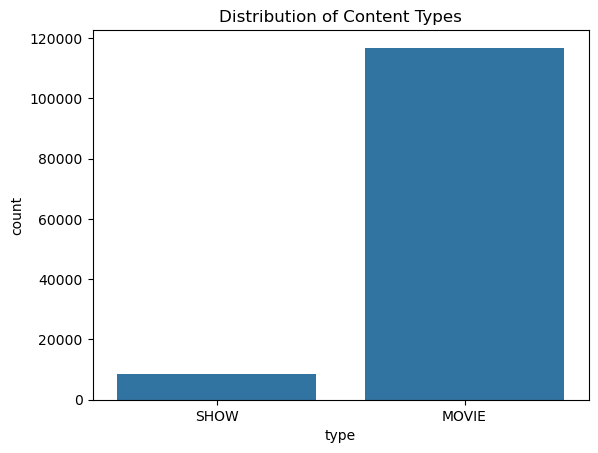

In [35]:
# 1. Content Type Distribution
sns.countplot(x='type', data=df)
plt.title('Distribution of Content Types')
plt.show()

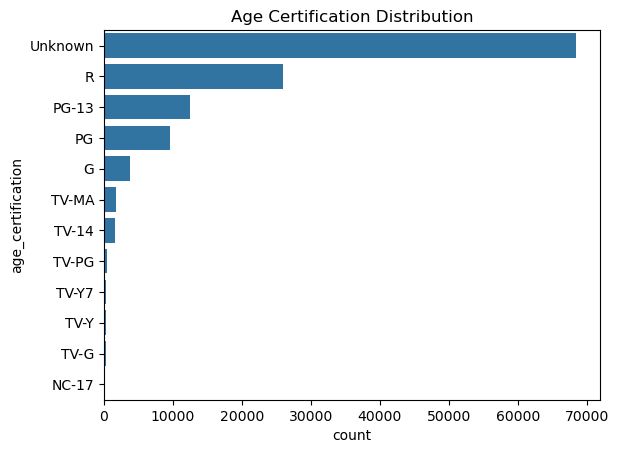

In [37]:
# 2. Age Certification Distribution
sns.countplot(y='age_certification', data=df, order=df['age_certification'].value_counts().index)
plt.title('Age Certification Distribution')
plt.show()

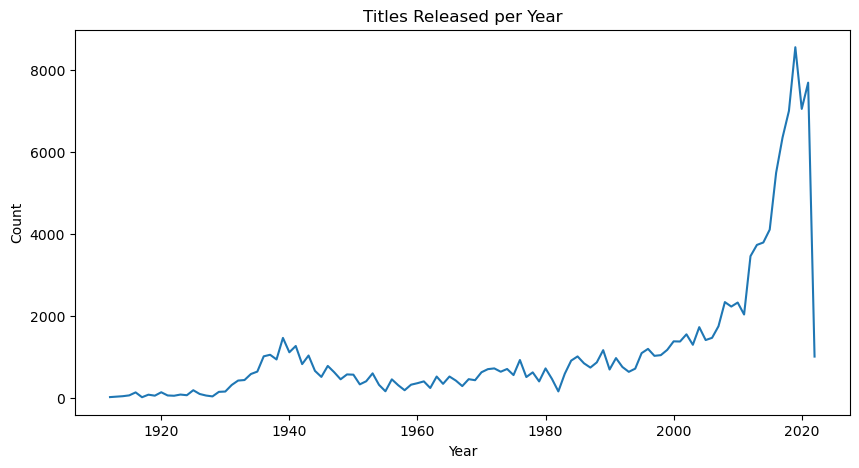

In [39]:
# 3. Titles Released per Year
df['release_year'].value_counts().sort_index().plot(kind='line', figsize=(10, 5))
plt.title('Titles Released per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

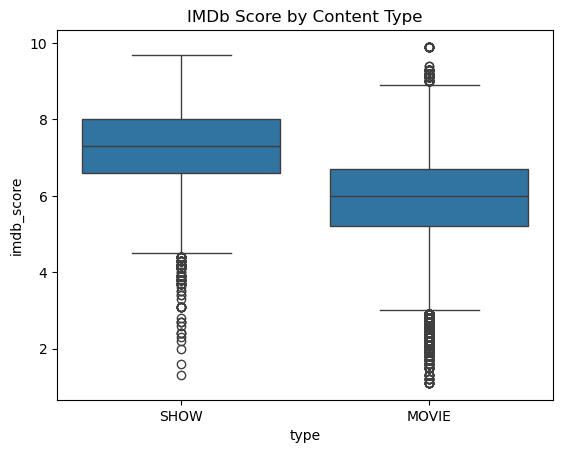

In [41]:
# 4. IMDb Score by Type
sns.boxplot(x='type', y='imdb_score', data=df[df['imdb_score'] > 0])
plt.title('IMDb Score by Content Type')
plt.show()

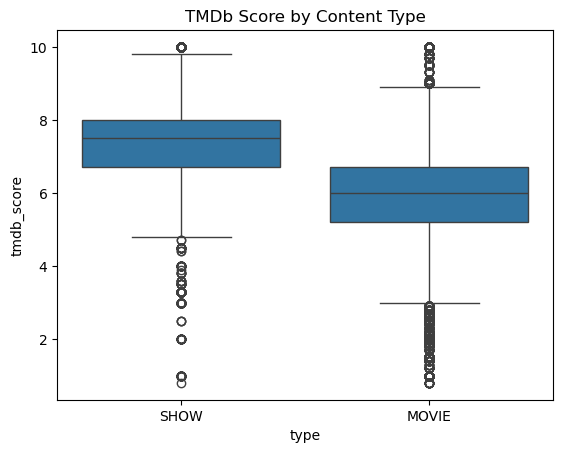

In [43]:
# 5. TMDb Score by Type
sns.boxplot(x='type', y='tmdb_score', data=df[df['tmdb_score'] > 0])
plt.title('TMDb Score by Content Type')
plt.show()

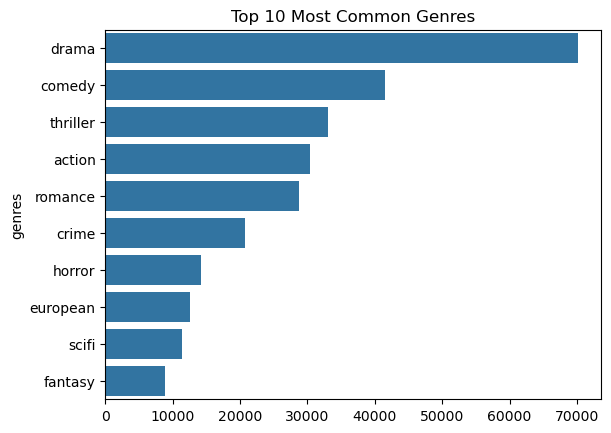

In [45]:
# 6. Top 10 Most Frequent Genres
genre_series = df['genres'].explode()
top_genres = genre_series.value_counts().head(10)
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title('Top 10 Most Common Genres')
plt.show()

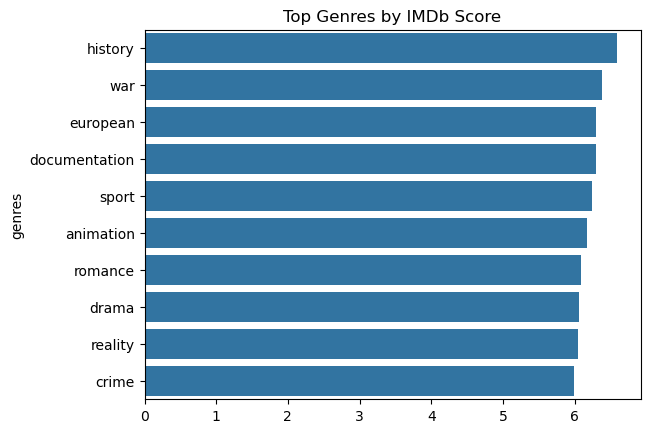

In [47]:
# 7. Top Genres by IMDb Score
avg_score_by_genre = df.explode('genres').groupby('genres')['imdb_score'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=avg_score_by_genre.values, y=avg_score_by_genre.index)
plt.title('Top Genres by IMDb Score')
plt.show()

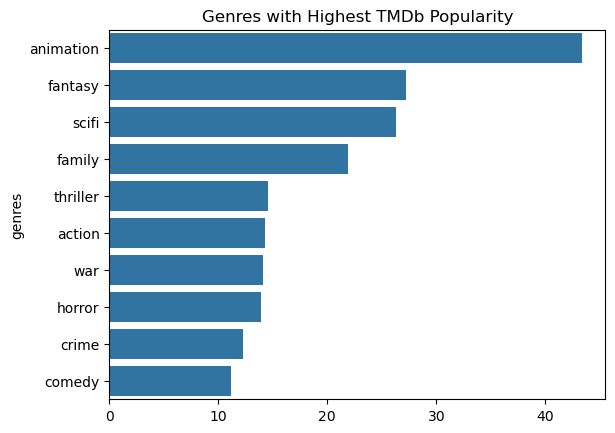

In [49]:
# 8. Genre Popularity by TMDb Popularity
avg_pop_by_genre = df.explode('genres').groupby('genres')['tmdb_popularity'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=avg_pop_by_genre.values, y=avg_pop_by_genre.index)
plt.title('Genres with Highest TMDb Popularity')
plt.show()

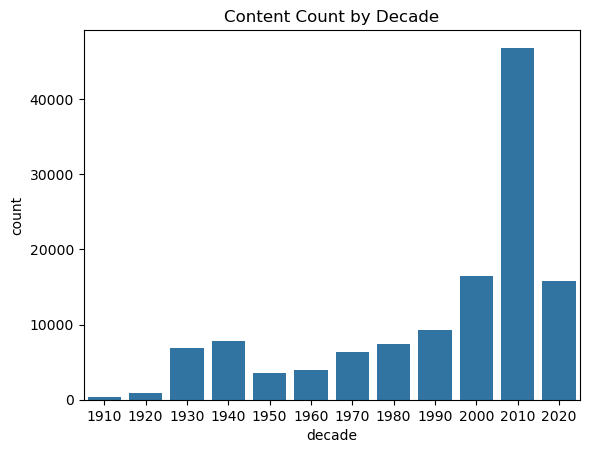

In [51]:
# 9. Decade-wise Content Production
sns.countplot(x='decade', data=df, order=sorted(df['decade'].dropna().unique()))
plt.title('Content Count by Decade')
plt.show()

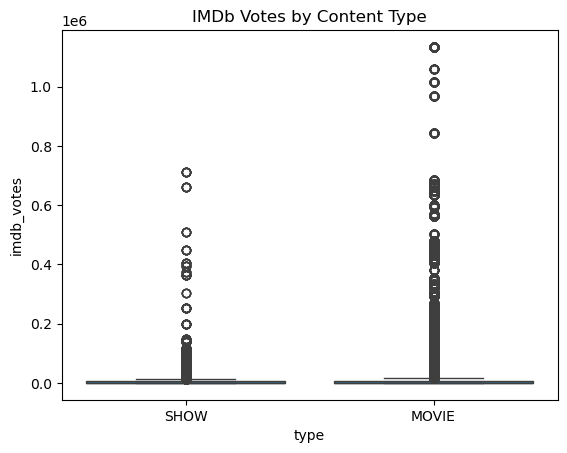

In [53]:
# 10. IMDb Votes Distribution by Type
sns.boxplot(x='type', y='imdb_votes', data=df[df['imdb_votes'] > 0])
plt.title('IMDb Votes by Content Type')
plt.show()

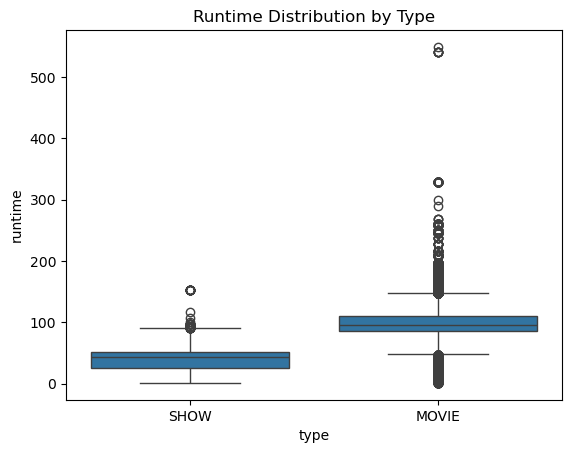

In [55]:
# 11. Runtime Distribution by Type
sns.boxplot(x='type', y='runtime', data=df)
plt.title('Runtime Distribution by Type')
plt.show()

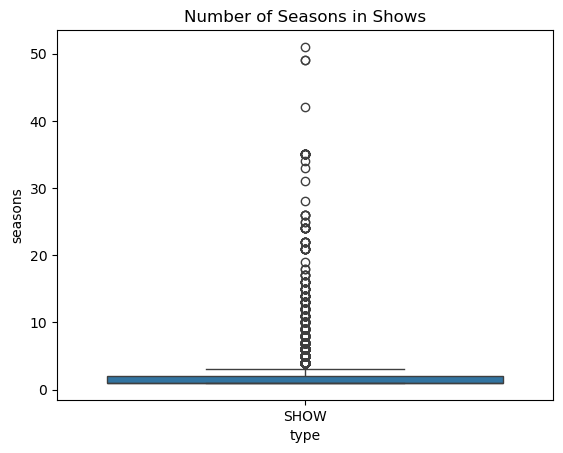

In [57]:
# 12. Number of Seasons in Shows
sns.boxplot(x='type', y='seasons', data=df[df['type'] == 'SHOW'])
plt.title('Number of Seasons in Shows')
plt.show()

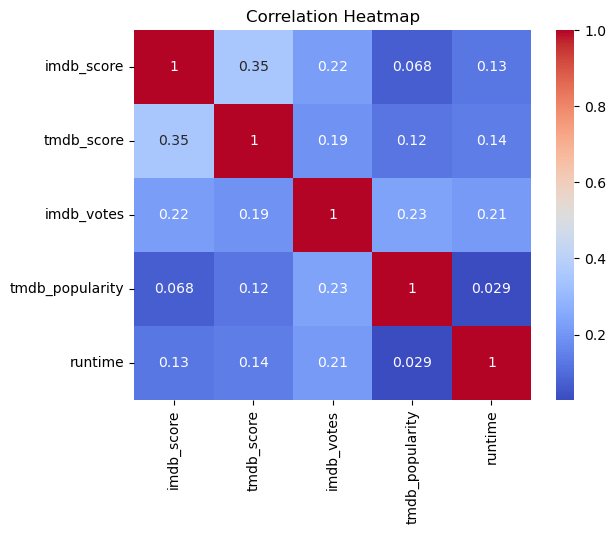

In [59]:
# 13. Correlation Heatmap
sns.heatmap(df[['imdb_score', 'tmdb_score', 'imdb_votes', 'tmdb_popularity', 'runtime']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

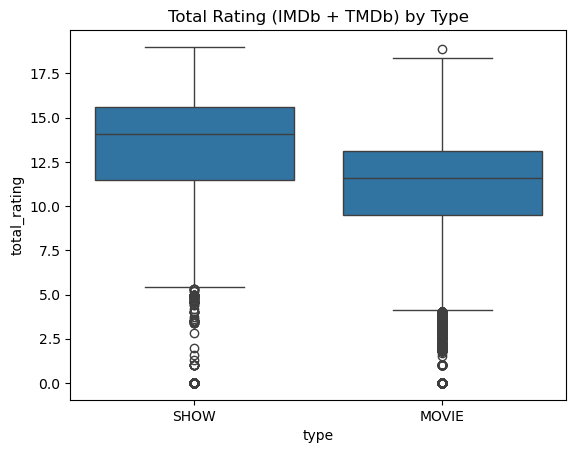

In [61]:
# 14. Total Rating by Content Type
sns.boxplot(x='type', y='total_rating', data=df)
plt.title('Total Rating (IMDb + TMDb) by Type')
plt.show()

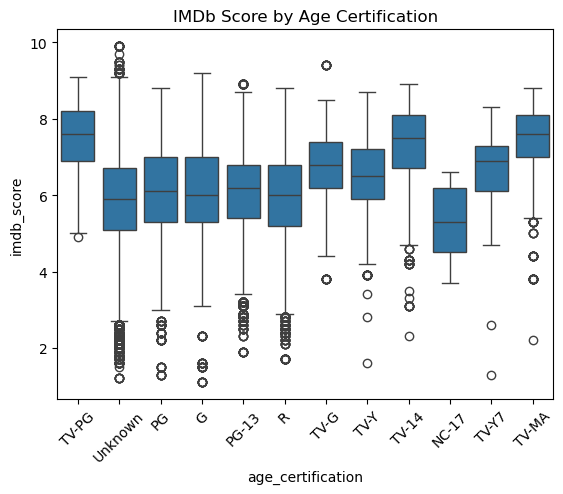

In [63]:
# 15. IMDb Score by Age Certification
sns.boxplot(x='age_certification', y='imdb_score', data=df[df['imdb_score'] > 0])
plt.title('IMDb Score by Age Certification')
plt.xticks(rotation=45)
plt.show()

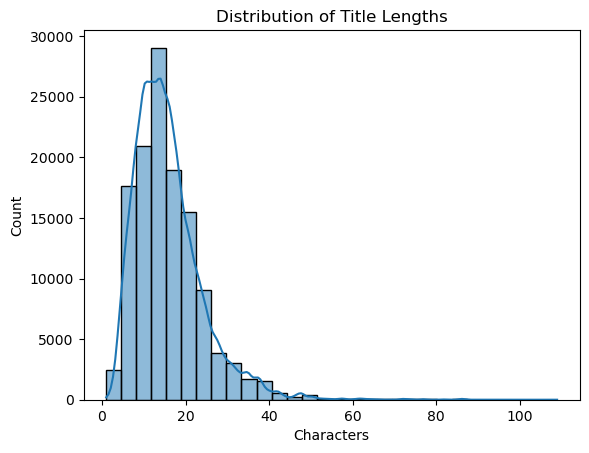

In [65]:
# 16. Title Length Distribution
sns.histplot(df['title_length'], bins=30, kde=True)
plt.title('Distribution of Title Lengths')
plt.xlabel('Characters')
plt.show()

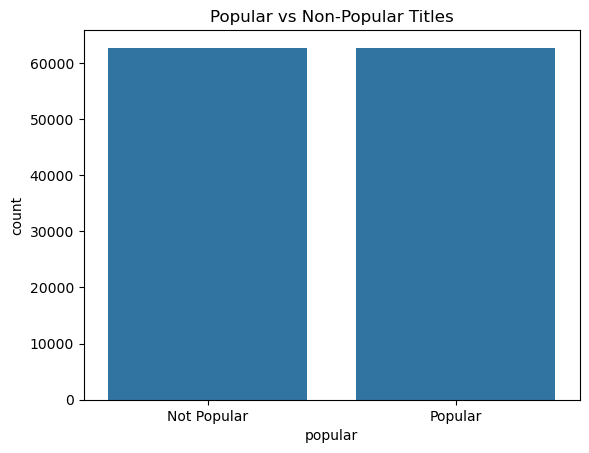

In [67]:
# 17. Popular vs Non-Popular Titles
sns.countplot(x='popular', data=df)
plt.title('Popular vs Non-Popular Titles')
plt.xticks([0, 1], ['Not Popular', 'Popular'])
plt.show()

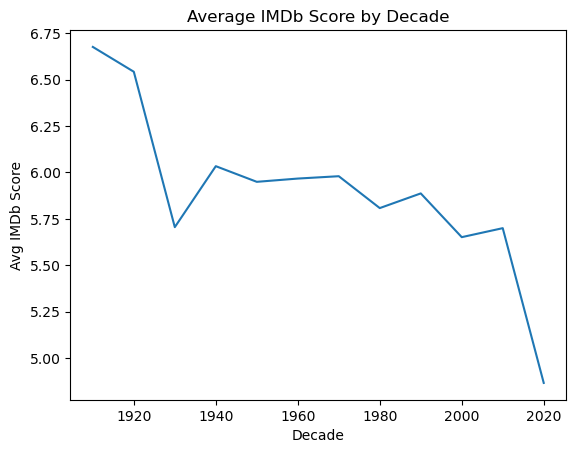

In [69]:
# 18. Average IMDb Score by Decade
decade_avg = df.groupby('decade')['imdb_score'].mean()
sns.lineplot(x=decade_avg.index, y=decade_avg.values)
plt.title('Average IMDb Score by Decade')
plt.xlabel('Decade')
plt.ylabel('Avg IMDb Score')
plt.show()

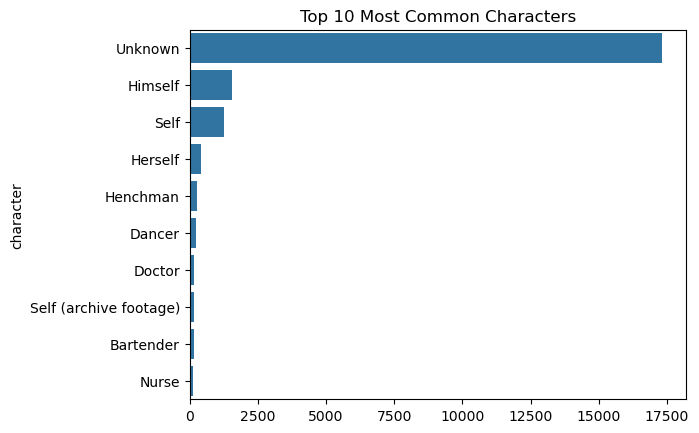

In [71]:
# 19. Top 10 Most Common Characters
top_characters = df['character'].value_counts().head(10)
sns.barplot(x=top_characters.values, y=top_characters.index)
plt.title('Top 10 Most Common Characters')
plt.show()

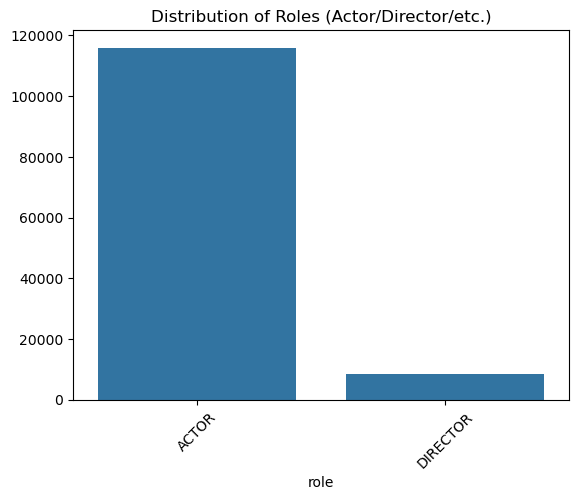

In [73]:
# 20. Distribution of Roles (Actor/Director/etc.)
role_counts = df['role'].value_counts()
sns.barplot(x=role_counts.index, y=role_counts.values)
plt.title('Distribution of Roles (Actor/Director/etc.)')
plt.xticks(rotation=45)
plt.show()

# Solution to Business Objective

->Content Strategy Optimization
Insight: The distribution of content types shows a mix of movies and shows, with varying popularity and scores.

-> Genre Focus for Targeted Content Creation
Insight: The top genres by frequency and IMDb scores reveal which genres attract viewers and are critically acclaimed.

->Age Certification and Audience Segmentation
Insight: IMDb scores and counts vary by age certification.

->Leverage Popularity Signals for Recommendation Engines
Insight: Popular titles (above median TMDb popularity) can be differentiated.




# CONCLUSION

Several important insights into content production, audience preferences, and content performance are revealed by the exploratory data analysis of the combined titles and credits dataset. With significant variations in ratings, popularity, and viewer engagement metrics, the distribution of content types shows a well-balanced mix of films and television series. The landscape is dominated by popular genres like drama, thriller, and comedy, which frequently correlate with higher IMDb scores and TMDb popularity, indicating that audiences find these genres appealing.

While the analysis of runtime and number of seasons offers guidance for optimizing content length and format to maximize viewer retention, age certification categories emphasize the significance of customizing content to diverse audience segments. The patterns of correlation between popularity, runtime, ratings, and votes highlight the interrelated elements that lead to